In [6]:
# Classic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Advanced Visualization Libraries
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True) #enables plotly plots to be displayed in notebook
cmap1 = "gist_gray"

#Models
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB      

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

#Metrics, Preprocessing and Tuning Tools
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import missingno as msno
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#Customization
import warnings
warnings.filterwarnings("ignore")
from termcolor import colored

In [8]:
# Reading the dataset
df = pd.read_csv('kidney_disease.csv')
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
# Printing the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Descriptive statistics of the data set
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


--------------------- RESULT ---------------------
Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1
--------------------------------------------------


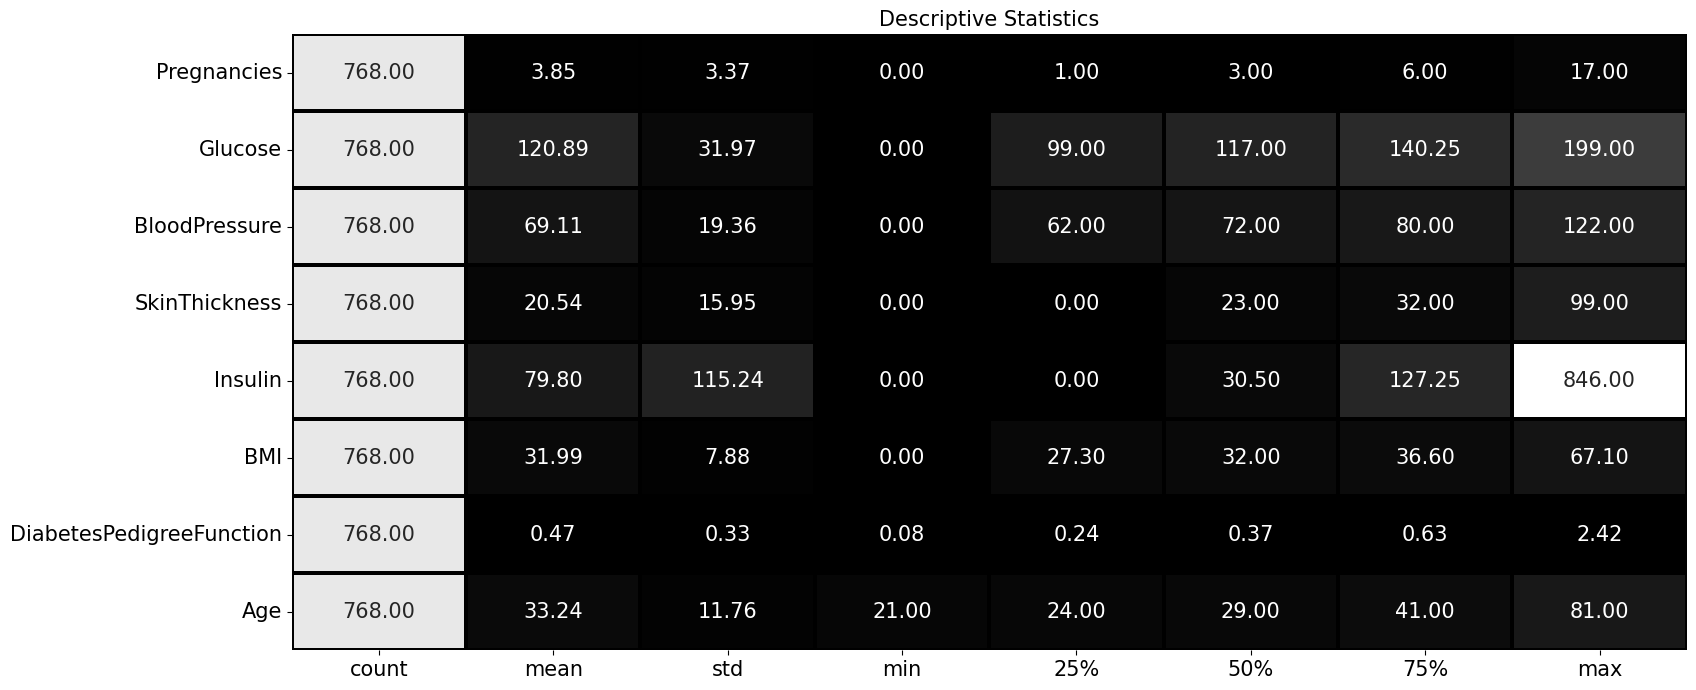

In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(" RESULT ".center(50, "-"))
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    print("".center(50, "-"))
    
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)



def descriptive_stats(df):
    desc = df.describe().T
    desc_df = pd.DataFrame(index = df. columns,
                          columns = desc.columns,
                          data = desc)
    f, ax = plt.subplots(figsize = (18, 8))
    sns.heatmap(desc,
               annot = True,
               cmap = cmap1,
               fmt = ".2f",
               ax = ax,
               linecolor = "black",
               linewidths = 1.5,
               cbar = False,
               annot_kws = {"size" : 15})
    plt.xticks(size = 15)
    plt.yticks(size = 15, rotation = 0)
    plt.title("Descriptive Statistics", size = 15)
    plt.show()
    
   
descriptive_stats(df[num_cols])

In [7]:
# Print the size of the data set. It consists of 768 observation units and 9 variables.
print("Dataset shape:", df.shape)

Dataset shape: (768, 9)


In [8]:
# Print the distribution of the Outcome variable.
df["Outcome"].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

In [9]:
# Print the classes of the outcome variable.
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
#MIISING VALUES
df.isnull().sum().sort_values(ascending = False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Summary of the Dataset

- The dataset consists of 768 rows and 8 columns
- The target variable is Outcome, which contains categorical binary values 0 and 1
- The variables other than Outcome are numerical
- There are technically no missing values because of lack NaN values, however when we examine closely, some 0's in the dataset indicate they are actually missing values
- Descriptive statistics show that some features may have outliers (for example, 17 pregnancies can be an outlier)

# VISUALISATION 

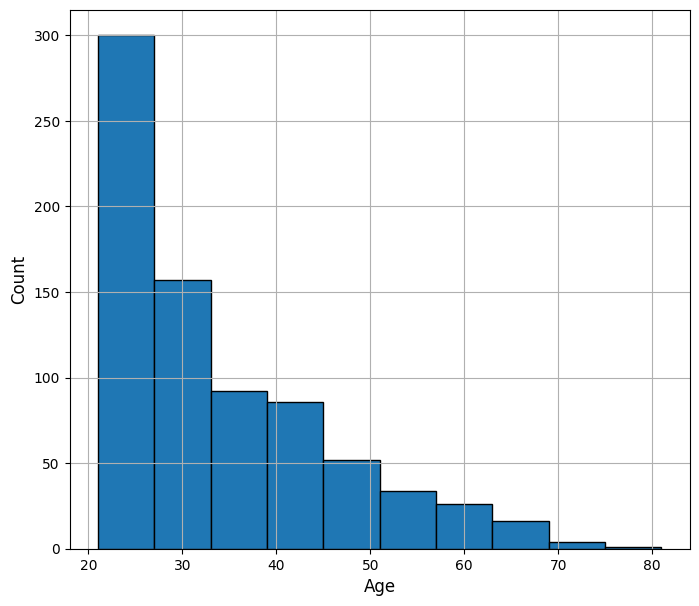

In [11]:
# Plot the histogram of the Age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
df["Age"].hist(edgecolor = "black");

In [12]:
print("Max Age: " + str(df["Age"].max()) +','+ " Min Age: " + str(df["Age"].min()))

Max Age: 81, Min Age: 21


<Axes: xlabel='BMI', ylabel='Density'>

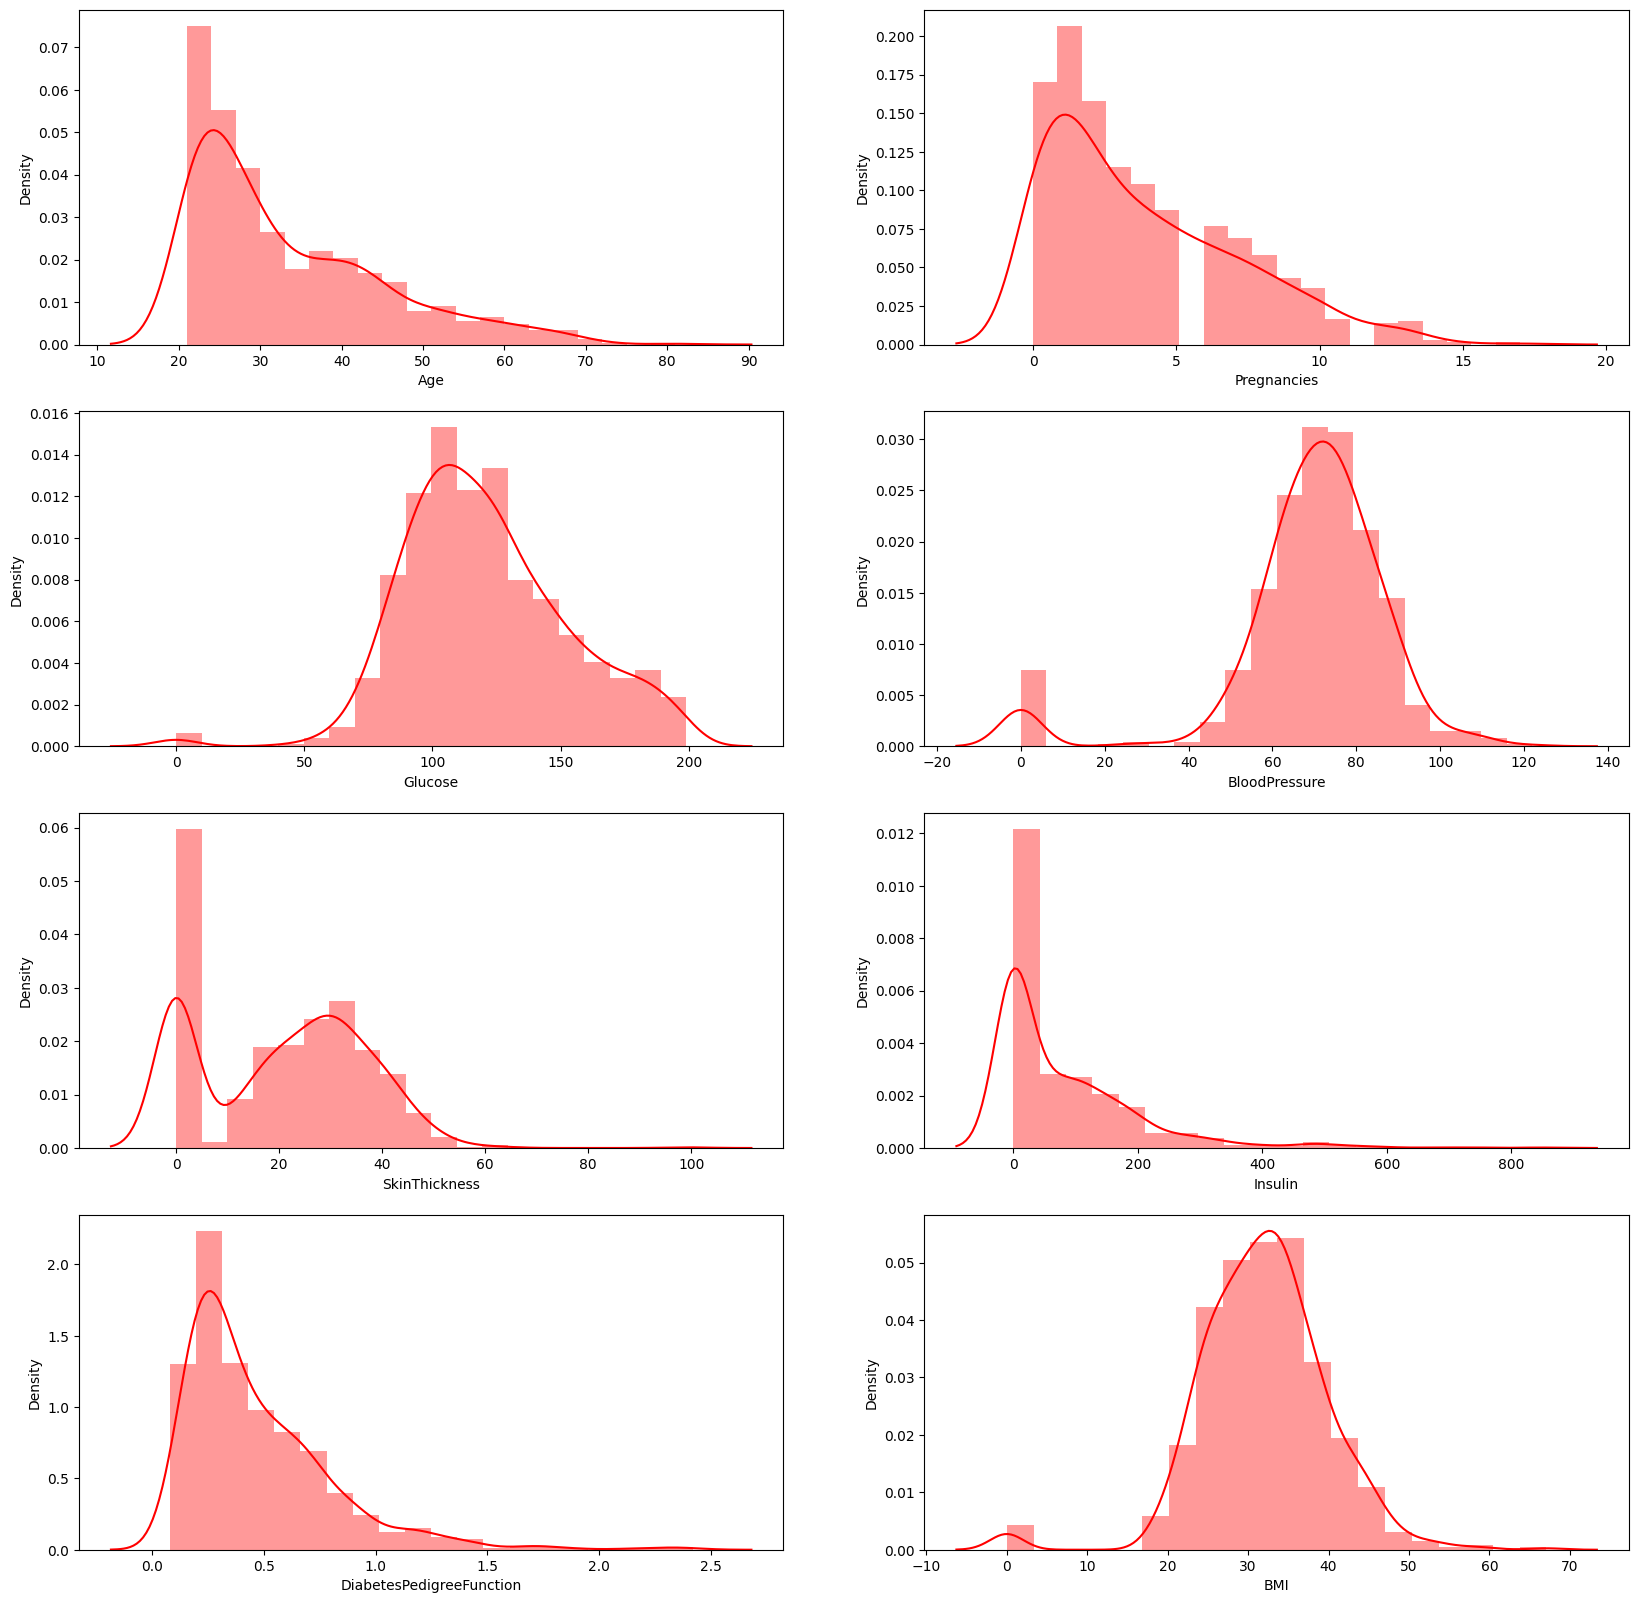

In [13]:
# Plot histogram and density graphs of all variables
fig, ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Age, bins = 20, ax=ax[0,0], color="red") 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1], color="red") 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0], color="red") 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1], color="red") 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0], color="red")
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0], color="red") 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1], color="red")

In [14]:
df.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [15]:
df.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


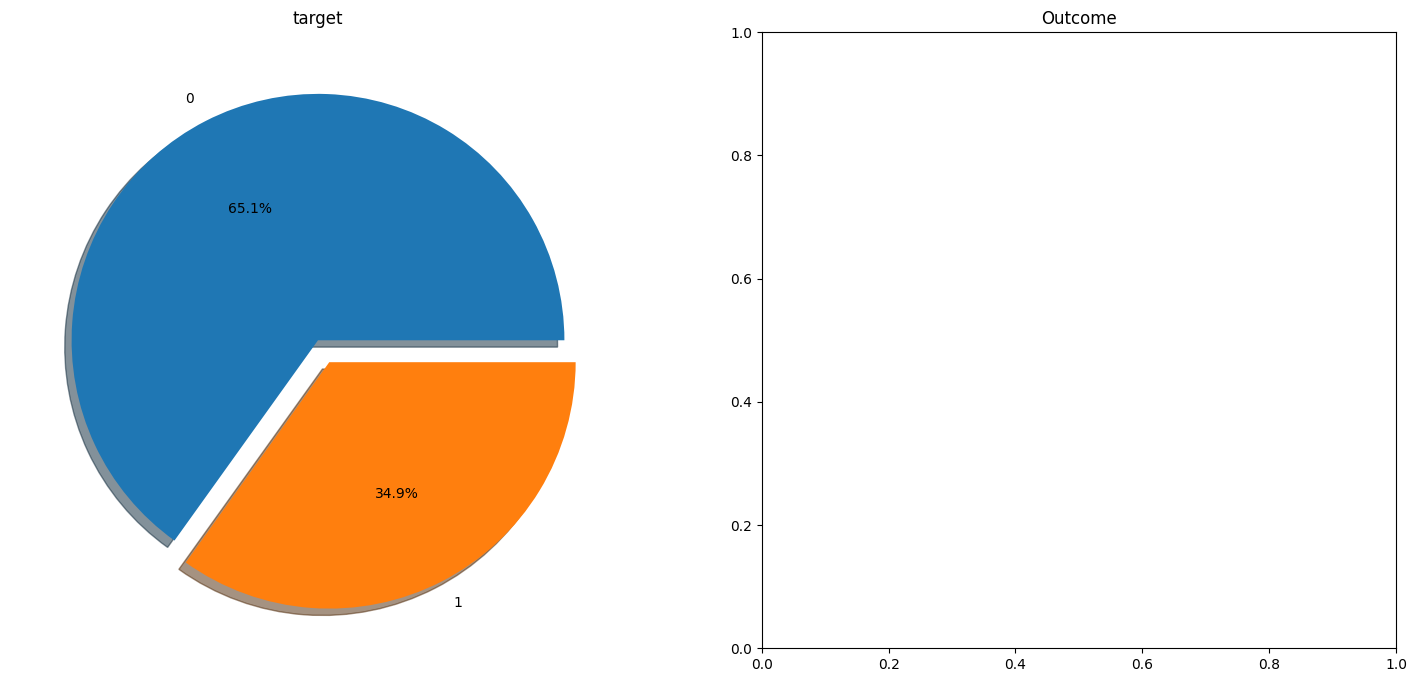

In [16]:
# Visualize the distribution of the outcome variable in the data -> 0 - Healthy, 1 - Diabetic
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
ax[1].set_title('Outcome')
plt.show()

# FEATURE ENGINEERING


This step will include filling missing values, outlier detection and removal, feature engineering, scaling and splitting data.
Even though there are many methods all of which are useful to some degree case by case, a common approach to handle missing values is filling them with unbiased statistics like mode, mean or median. Because removal of them means loss of information and imputation methods bring the possibility of changing the distribution of features.

As for outliers, the initial action is to detect them. Then we need to examine them carefully and determine if they affect the model or not. Analysts generally tend to keep them in the dataset, because removing them can lead to loss of information, which is an awful thing for the accuracy of models. However, if they contain extreme values, then removal of the outliers can be taken into account.

After these processes comes the feature engineering. This step is the key of a successful model.

As you can guess, raw data lack enough information or are bloated with irrelevant variables on most occasions. We should feel the urge to fix these issues whenever we see them in our projects and the way to do so is feature engineering. Selecting the relevant features or creating the new ones always increase the accuracy of models.

And after everythings is done, don't forget to scale your data and split it into two groups as test and train data.


In [17]:
df.loc[df.Age.between(18,31), "AgeGroup"] = "Young"
df.loc[df.Age.between(31,46), "AgeGroup"] = "MiddleAge"
df.loc[df.Age.between(46,66), "AgeGroup"] = "LateMiddleAge"
df.loc[df.Age >= 66,"AgeGroup"] = "Old"

In [18]:
df['Insulin'] = df['Insulin'].fillna(df.groupby(["AgeGroup", "Outcome"])['Insulin'].transform('median'))
df['Insulin'] = df['Insulin'].fillna(df.groupby('Outcome')['Insulin'].transform('median')) 
df['SkinThickness'] = df['SkinThickness'].fillna(df.groupby('Outcome')['SkinThickness'].transform('median'))  
df["BloodPressure"] = df["BloodPressure"].fillna(df.groupby("Outcome")["BloodPressure"].transform('median'))
df['BMI'] = df['BMI'].fillna(df.groupby(["AgeGroup", "Outcome"])['BMI'].transform('median'))
df["Glucose"] = df["Glucose"].fillna(df.groupby("Outcome")["Glucose"].transform('median'))

In [19]:
df.loc[df.BMI < 18.5, "BMIClass"] = "Underweight"
df.loc[df.BMI.between(18.5, 25.0), "BMIClass"] = "Normal"
df.loc[df.BMI.between(25.0, 30.0), "BMIClass"] = "Overweight"
df.loc[df.BMI.between(30.0, 35.0), "BMIClass"] = "Obese"
df.loc[df.BMI >= 35.0 , "BMIClass"] = "ExtremelyObese"

df.loc[df.Insulin < 120  , 'InsulinThreshold'] ="Below"
df.loc[df.Insulin >= 120 , 'InsulinThreshold'] ="Above"

df.loc[df.Pregnancies > 0, "HasChild"] = "Yes"
df.loc[df.Pregnancies == 0, "HasChild"] = "No"

df.loc[df.BMI < 30, "IsObese"] = "No"
df.loc[df.BMI >= 30, "IsObese"] = "Yes"

In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMIClass,InsulinThreshold,HasChild,IsObese
0,6,148,72,35,0,33.6,0.627,50,1,LateMiddleAge,Obese,Below,Yes,Yes
1,1,85,66,29,0,26.6,0.351,31,0,MiddleAge,Overweight,Below,Yes,No
2,8,183,64,0,0,23.3,0.672,32,1,MiddleAge,Normal,Below,Yes,No
3,1,89,66,23,94,28.1,0.167,21,0,Young,Overweight,Below,Yes,No
4,0,137,40,35,168,43.1,2.288,33,1,MiddleAge,ExtremelyObese,Above,No,Yes


In [21]:
def outlier_thresholds(dataframe, col_name, q1 = 0.25, q3 = 0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable, q1 = 0.25, q3 = 0.75):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1 = q1, q3 = q3)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
for col in df[num_cols].columns:
    replace_with_thresholds(df, col, q1 = 0.1, q3 = 0.9)
    
def cat_var_summary(df, cat_var):
    colors = ['#a2b9bc', '#6b5b95', '#b2ad7f', '#feb236', '#b5e7a0', '#878f99',
              '#d64161', '#86af49', '#ff7b25']
    
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentages'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])
    
    x = [str(i) for i in df[cat_var].value_counts().index]
    y = df[cat_var].value_counts().values.tolist()
    
    fig.add_trace(go.Bar(x = x, y = y, text = y, 
                         textposition = "auto",
                       showlegend = False,
                        marker=dict(color=colors,
                              line = dict(color = 'black',
                                          width = 2))), row=1, col=1)
    
    fig.add_trace(go.Pie(labels = df[cat_var].value_counts().keys(),
                         values = df[cat_var].value_counts().values, 
                         hoverinfo ='label',
                  textinfo ='percent',
                  textfont_size = 20,
                  textposition ='auto',
                  marker=dict(colors=colors,
                              line = dict(color = 'black',
                                          width = 2))), row=1, col=2)

    
    fig.update_layout(title={'text': cat_var,
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_dark')
    
    iplot(fig)    

In [22]:
for i in ["BMIClass", "AgeGroup", "InsulinThreshold", "HasChild", "IsObese"]:
    cat_var_summary(df, i)

In [8]:
import pdfplumber
import pandas as pd

with pdfplumber.open("Dialysis-Facilities-Comprehensive.pdf") as pdf:
    tables = []
    standardized_columns = None  # Placeholder for consistent column names

    for page in pdf.pages:
        table = page.extract_table()
        if table:
            # Convert table to DataFrame
            df = pd.DataFrame(table[1:], columns=[f"Column_{i}" if col is None or col == "" else col for i, col in enumerate(table[0])])

            # Standardize columns across pages
            if standardized_columns is None:
                standardized_columns = df.columns  # Set the first page’s columns as standard
            else:
                df.columns = standardized_columns  # Rename to match standard columns

            tables.append(df.reset_index(drop=True))  # Reset index to avoid conflicts

# Concatenate all tables
if tables:
    renal_df = pd.concat(tables, ignore_index=True, axis=0)
    print(renal_df.head())

# Save to CSV if needed
renal_df.to_csv("Hospitals.csv", index=False)


                           Column_0     Column_1            Column_2  \
0  COMPREHENSIVE DIALYSIS HOSPITALS         None                None   
1                                           None                None   
2                            COUNTY  NHIF OFFICE  NHIF HOSPITAL CODE   
3                             BOMET        BOMET                4718   
4                             BOMET        BOMET                4119   

                           Column_3  
0                              None  
1                              None  
2                     HOSPITAL NAME  
3  LONGISA COUNTY REFERRAL HOSPITAL  
4     TENWEK HOSPITAL BOMET (SOTIK)  


In [9]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("Hospitals.csv")
df.head()




,Column_0,Column_1,Column_2,Column_3
0,COMPREHENSIVE DIALYSIS HOSPITALS,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,COUNTY,NHIF OFFICE,NHIF HOSPITAL CODE,HOSPITAL NAME
3,BOMET,BOMET,4718,LONGISA COUNTY REFERRAL HOSPITAL
4,BOMET,BOMET,4119,TENWEK HOSPITAL BOMET (SOTIK)


In [10]:
import pandas as pd

# Load your DataFrame (after converting from PDF or reading from CSV)
df = pd.read_csv("Hospitals.csv")

# Drop rows that contain "COMPREHENSIVE DIALYSIS HOSPITALS" in the first column
df = df[df['Column_0'] != "COMPREHENSIVE DIALYSIS HOSPITALS"]

# Drop rows where all entries are NaN
df = df.dropna(how="all")

# Display the cleaned DataFrame
df.head()



,Column_0,Column_1,Column_2,Column_3
2,COUNTY,NHIF OFFICE,NHIF HOSPITAL CODE,HOSPITAL NAME
3,BOMET,BOMET,4718,LONGISA COUNTY REFERRAL HOSPITAL
4,BOMET,BOMET,4119,TENWEK HOSPITAL BOMET (SOTIK)
5,BUNGOMA,BUNGOMA,4440082,BUNGOMA DISTRICT HOSPITAL
6,NAIROBI,B U R U B U R U,8 0 0 0 1 4 2,E D E L V A L E T R U S T J A M A A H $ M H O ...
